In [3]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import box
import base64, io


In [29]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import box
import base64, io

# ---- user inputs ---------------------------------------------------------
# lat, lon   = 47.6062, -122.3321          # Seattle, WA
lat, lon = 47.615747, -122.322268
zoomkm     = 2                         # map half-width in km
fault_zip  = "/Users/rolfskog/Downloads/WA_Qfault_2020_Update_Shapefile" # or the nationwide file
outfile    = "wa_faults_map.png"
# --------------------------------------------------------------------------

# Build a GeoDataFrame with the point of interest
poi = gpd.GeoSeries.from_xy([lon], [lat], crs="EPSG:4326").to_crs(3857)
x, y = poi.geometry.iloc[0].x, poi.geometry.iloc[0].y

# Construct a square bounding box around the point (Web-Mercator metres)
half = zoomkm * 1_000
xmin, ymin, xmax, ymax = x-half, y-half, x+half, y+half
bbox = box(xmin, ymin, xmax, ymax)
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox], crs=3857)

# Read and crop the fault layer
faults = gpd.read_file(fault_zip)
faults = faults.to_crs(3857)            # match web-mercator
faults_clip = gpd.clip(faults, bbox_gdf)

# Plot

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(xmin, xmax)                       # 1️⃣ force extent
ax.set_ylim(ymin, ymax)
ax.set_aspect("equal")                        # keep it square

if not faults_clip.empty:                     # 2️⃣ only plot if we have data
    faults_clip.plot(ax=ax)
ax.plot(poi.geometry.iloc[0].x, poi.geometry.iloc[0].y, "ro")
# 2) Use a light-gray basemap instead of US Topo
ctx.add_basemap(
    ax,
    source="https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}",
    crs=3857,
    attribution="USGS National Map"
)

# ctx.add_basemap(
#     ax,
#     source="https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}",
#     crs=3857,
#     attribution="USGS National Map"      # always give credit 🙌
# )

ax.set_axis_off()
plt.tight_layout()
plt.savefig(outfile, dpi=300, bbox_inches="tight")
plt.close()

# Base-64 encode for LLM embedding
with open(outfile, "rb") as f:
    b64_png = base64.b64encode(f.read()).decode()

print(b64_png[:120] + "…")   # show a preview of the token string

iVBORw0KGgoAAAANSUhEUgAACUIAAAlCCAYAAAANgXu+AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxv…


In [7]:
print(faults.crs)

EPSG:3857


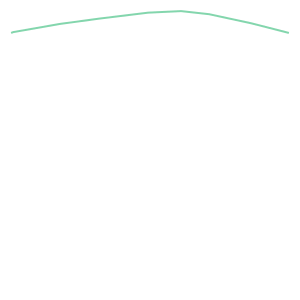

In [12]:
faults_clip.geometry.values[0]

<Axes: >

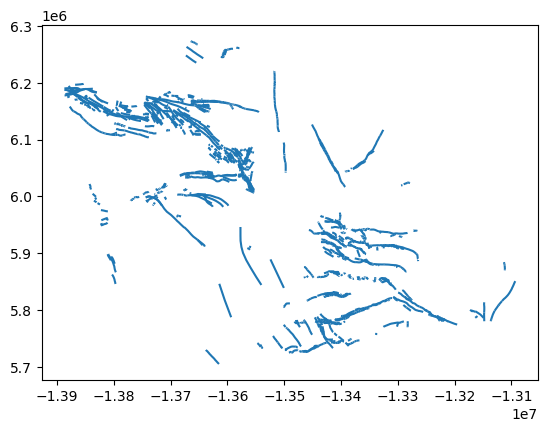

In [16]:
faults.plot()

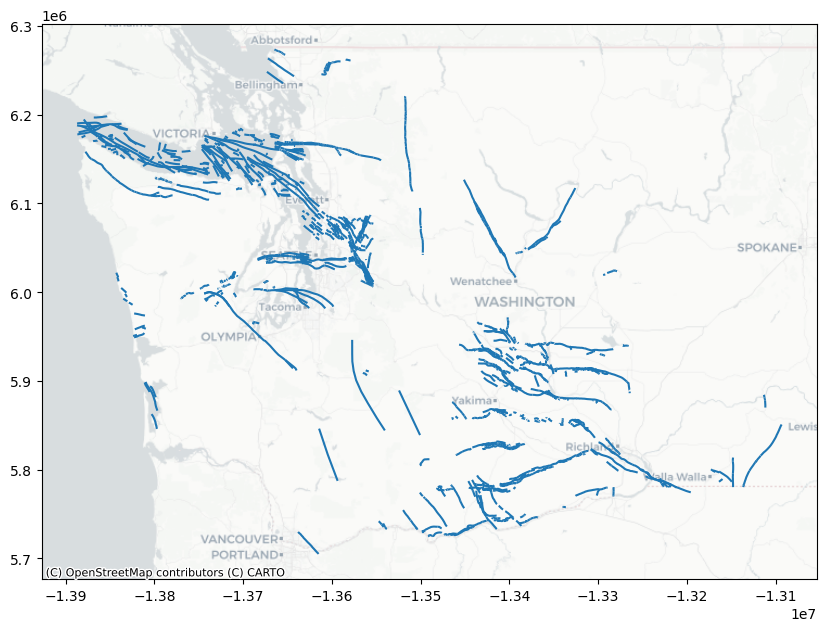

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the faults
faults.plot(ax=ax)

# Add a basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    crs=faults.crs,
    alpha=0.9
)

plt.show()